# Plots for the Final Ray Experiment for the Inference Stage
### Best Throughput
First of all, let's print the best throughput and its combinantion of parameters.

In [1]:
import pandas as pd

data = pd.read_csv('/home/joan/TFM/metrics_torchscript_embl_inference.csv')
best_throughput_row = data.loc[data['Throughput (img/sec)'].idxmax()]
    
# Print the best throughput and the corresponding parameters
print("Best Throughput:", best_throughput_row['Throughput (img/sec)'])
print("Corresponding Parameters:")
for col in best_throughput_row.index:
    print(f"{col}: {best_throughput_row[col]}")

Best Throughput: 8.412847864488505
Corresponding Parameters:
Job ID: 16000000
Dataset: 2024-01-08_11h01m57s
Preserve order: False
Parallelism: 25
Num cpus: 2
Batch size map_batches(): 32
Concurrency: 3
Dataset size (bytes): 428480
Num records dataset: 1772
Num blocks dataset: 25
Total time: 210.630220413208
Throughput (img/sec): 8.412847864488505
Total time w/o metadata fetching: 209.41208934783936
Throughput w/o metadata fetching (img/sec): 8.46178463487205


### Parallelism
Let's calculate the average throughput with each different value of parallelism [-1, 10, 25, 50] to see how relevant this parameter is.

In [2]:
# Group data by the "parallelism_read" value and calculate the mean throughput for each group
average_throughput_by_parallelism = data.groupby("Parallelism")["Throughput (img/sec)"].mean()

print("Average Throughput by Parallelism:")
print(average_throughput_by_parallelism)

Average Throughput by Parallelism:
Parallelism
-1     6.091493
 10    6.540822
 25    6.650496
 50    6.748146
Name: Throughput (img/sec), dtype: float64


Analysis of Throughput by Levels of Parallelism

- **Parallelism -1**: Auto-setting, the throughput here is approximately **6.091 images/sec**, which suggests that the auto-configured setting might not be fully optimized or might be conservative in resource usage.

- **Parallelism 10**: At this level, the throughput increases to about **6.541 images/sec**. This improvement over the auto-setting suggests that explicitly setting parallelism can lead to better utilization of resources.

- **Parallelism 25**: Further increasing the parallelism to 25 leads to a slight increase in throughput to **6.650 images/sec**.

- **Parallelism 50**: At the highest tested level of parallelism, the throughput is approximately **6.748 images/sec**. The small increment from parallelism 25 to 50 again highlights the diminishing returns and possibly approaching the practical limit of throughput gains from added parallelism, given the current hardware and software configuration.

Observations

1. **Efficiency Gains**: The data shows efficiency gains with increased parallelism, but the rate of increase slows down as parallelism increases.

2. **Optimal Parallelism**: For the given environment and dataset, a parallelism setting between 25 and 50 seems to approach the optimal throughput. However, the slight increase between these two values suggests that closer to 25 might be more cost-effective, especially if resource utilization and computational overhead are considered.

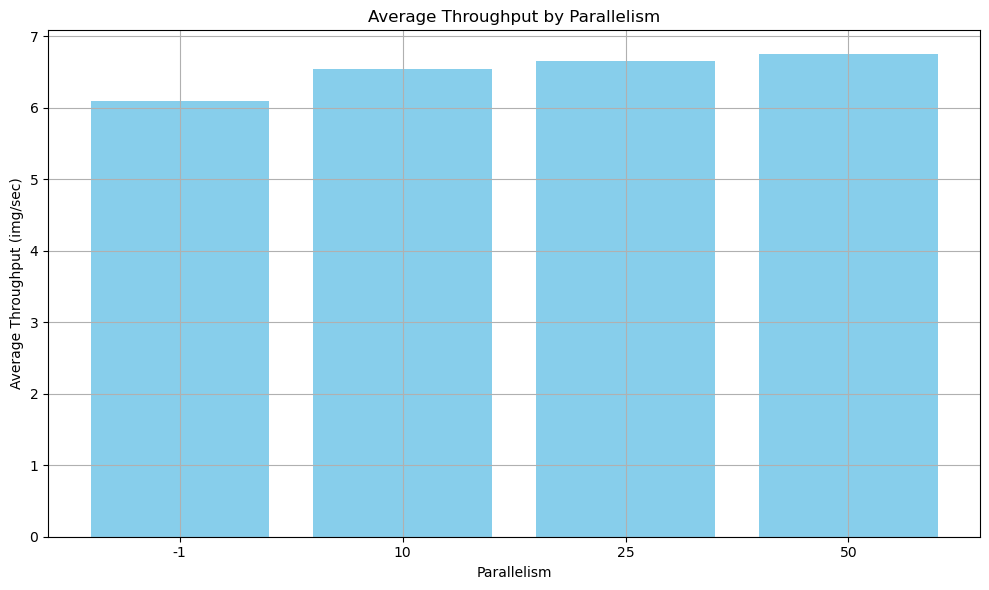

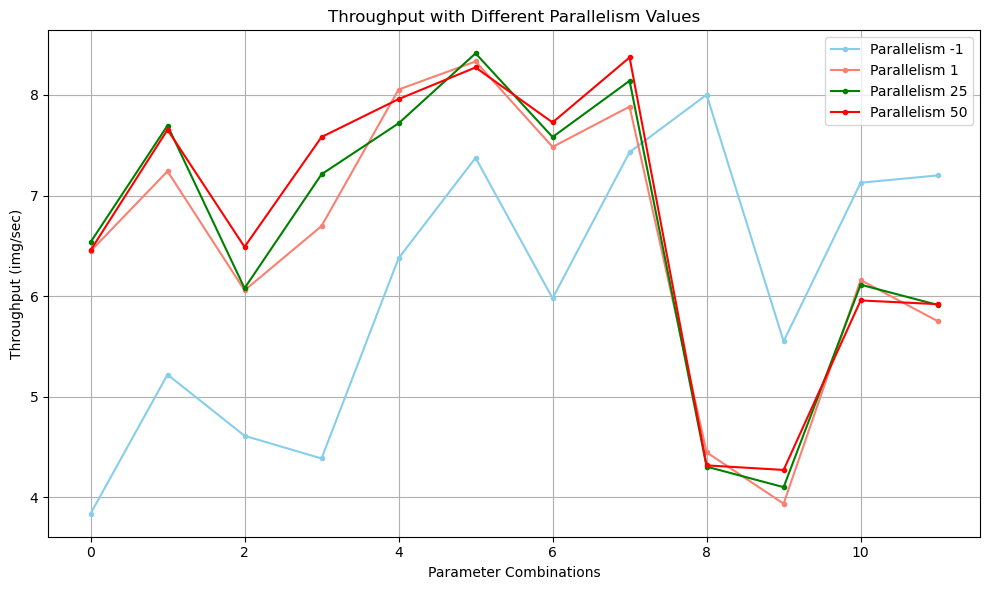

In [5]:
import matplotlib.pyplot as plt

average_throughput_by_parallelism = {
    -1: 6.091493,
    10: 6.540822,
    25: 6.650496,
    50: 6.748146
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_parallelism)), average_throughput_by_parallelism.values(), color='skyblue')
plt.xlabel('Parallelism')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Parallelism')
plt.xticks(range(len(average_throughput_by_parallelism)), average_throughput_by_parallelism.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter data where "Parallelism" is -1, 10, 25, or 50
parallelism_1 = data[data["Parallelism"] == -1]
parallelism_2 = data[data["Parallelism"] == 10]
parallelism_3 = data[data["Parallelism"] == 25]
parallelism_4 = data[data["Parallelism"] == 50]

# Create a list of parameter combinations for each parallelism value
param_combinations_1 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_1.iterrows()]
param_combinations_2 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_2.iterrows()]
param_combinations_3 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_3.iterrows()]
param_combinations_4 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_4.iterrows()]

# Extract throughput values for each parallelism value
throughput_values_1 = parallelism_1["Throughput (img/sec)"].tolist()
throughput_values_2 = parallelism_2["Throughput (img/sec)"].tolist()
throughput_values_3 = parallelism_3["Throughput (img/sec)"].tolist()
throughput_values_4 = parallelism_4["Throughput (img/sec)"].tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_combinations_1)), throughput_values_1, marker='.', color='skyblue', linestyle='-', label='Parallelism -1')
plt.plot(range(len(param_combinations_2)), throughput_values_2, marker='.', color='salmon', linestyle='-', label='Parallelism 1')
plt.plot(range(len(param_combinations_3)), throughput_values_3, marker='.', color='green', linestyle='-', label='Parallelism 25')
plt.plot(range(len(param_combinations_4)), throughput_values_4, marker='.', color='red', linestyle='-', label='Parallelism 50')
plt.xlabel('Parameter Combinations')
plt.ylabel('Throughput (img/sec)')
plt.title('Throughput with Different Parallelism Values')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### Num cpus
Similarly to Parallelism, let's calculate the average throughput with each different num of cpus (1, 2, 4, 8) to see how relevant this parameter is.

In [6]:
# Group data by the "num_cpus" value and calculate the mean throughput for each group
average_throughput_by_num_cpus = data.groupby("Num cpus")["Throughput (img/sec)"].mean()

print("Average Throughput by Num CPUs:")
print(average_throughput_by_num_cpus)

Average Throughput by Num CPUs:
Num cpus
1    5.805610
2    7.209868
Name: Throughput (img/sec), dtype: float64


Analysis of Throughput by Number of CPUs

- **1 CPU**: With a single CPU core, the throughput stands at approximately **5.806 images/sec**. This level of performance indicates the baseline capability of the system when limited to minimal computational resources. It reflects the fundamental efficiency of the processing tasks under constrained conditions.

- **2 CPUs**: Doubling the CPU allocation to two cores significantly increases the throughput to about **7.210 images/sec**. This represents an improvement of roughly 24% over using a single CPU. The increase is notable and suggests that the tasks involved in the pipeline are able to effectively utilize additional computational resources to enhance performance.

Observations

1. **Scalability**: The data suggests that the image processing tasks scale well with an increase in CPU cores from one to two. This is a good indication that further increases in CPU allocation could continue to enhance performance, though it's essential to test this to find the point of diminishing returns.

2. **Optimizing Resource Use**: Since doubling the CPU cores leads to a significant improvement in throughput, it might be beneficial to experiment with even more cores if available, to see if the trend continues. However, it is crucial to monitor for potential overhead that could arise from managing more cores, which might eventually lead to diminishing returns.

3. **Resource Efficiency**: Understanding the trade-offs between resource consumption and throughput gains is essential. If resource costs are a concern, finding the minimal number of CPUs that achieve nearly optimal throughput might be more desirable than simply maximizing throughput.

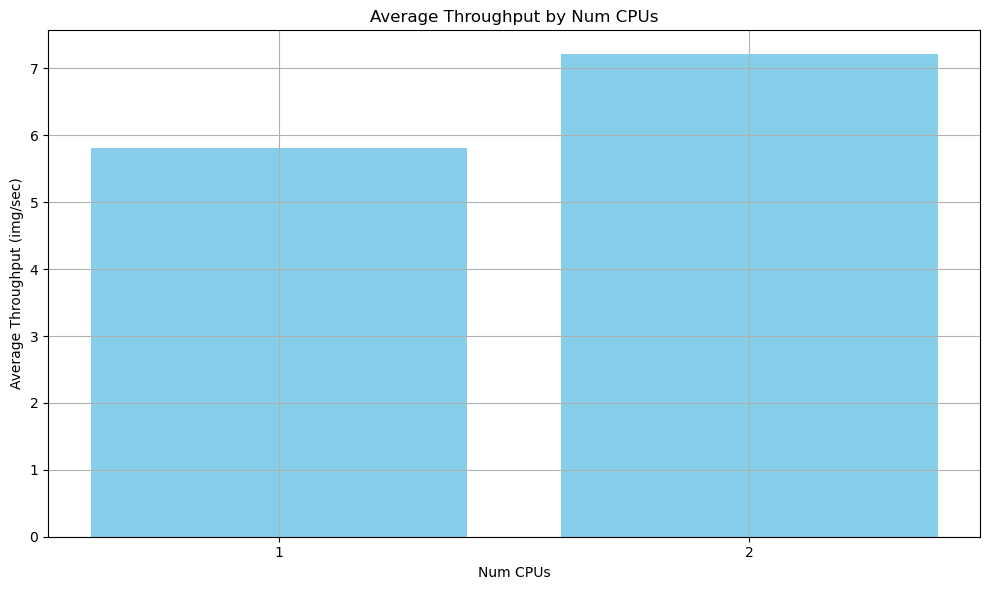

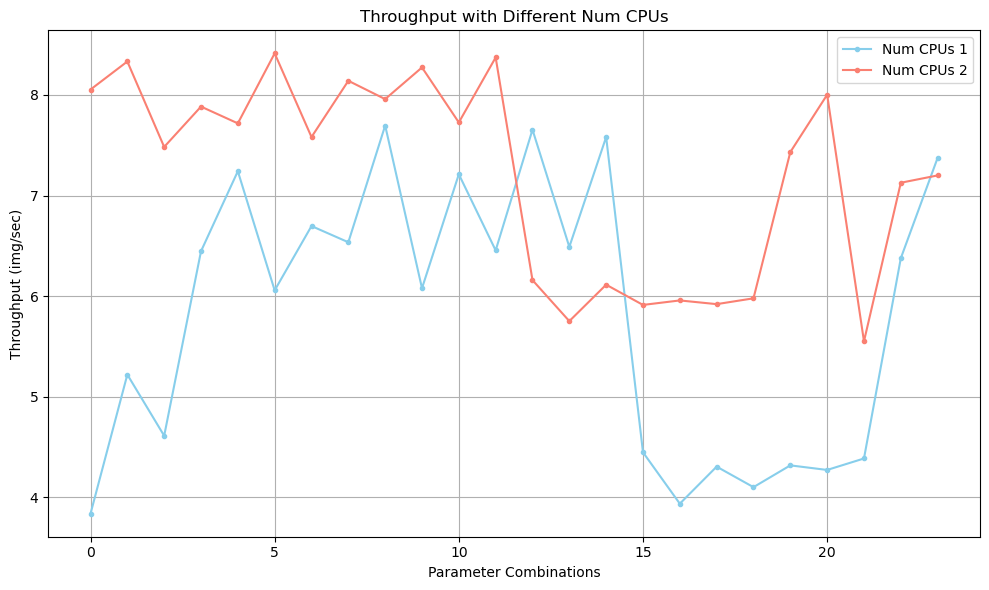

In [7]:
average_throughput_by_num_cpus = {
    1: 5.805610,
    2: 7.209868
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_num_cpus)), average_throughput_by_num_cpus.values(), color='skyblue')
plt.xlabel('Num CPUs')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Num CPUs')
plt.xticks(range(len(average_throughput_by_num_cpus)), average_throughput_by_num_cpus.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter data where "Num CPUs" is 1,2
num_cpus_1 = data[data["Num cpus"] == 1]
num_cpus_2 = data[data["Num cpus"] == 2]

# Create a list of parameter combinations for each value of "Num CPUs" (1, 2)
param_combinations_1 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in num_cpus_1.iterrows()]
param_combinations_2 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in num_cpus_2.iterrows()]

# Extract throughput values for each value of "Num CPUs"
throughput_values_1 = num_cpus_1["Throughput (img/sec)"].tolist()
throughput_values_2 = num_cpus_2["Throughput (img/sec)"].tolist()
# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_combinations_1)), throughput_values_1, marker='.', color='skyblue', linestyle='-', label='Num CPUs 1')
plt.plot(range(len(param_combinations_2)), throughput_values_2, marker='.', color='salmon', linestyle='-', label='Num CPUs 2')
plt.xlabel('Parameter Combinations')
plt.ylabel('Throughput (img/sec)')
plt.title('Throughput with Different Num CPUs')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### Batch Size of map_batches
Let's see how the last parameter affects individually to the throughput with each different value: [32, 64]

In [8]:
# Group data by the "batch_size_map_batches" value and calculate the mean throughput for each group
average_throughput_by_batch_size_map_batches = data.groupby("Batch size map_batches()")["Throughput (img/sec)"].mean()

print("Average Throughput by Batch Size map_batches():")
print(average_throughput_by_batch_size_map_batches)

Average Throughput by Batch Size map_batches():
Batch size map_batches()
32    6.734386
64    6.281093
Name: Throughput (img/sec), dtype: float64


Analysis of Throughput by Batch Size

- **Batch Size 32**: With a batch size of 32, the system achieves a throughput of approximately **6.734 images/sec**. This higher throughput indicates that this batch size may be closer to the optimal balance between processing speed and resource utilization for your specific setup.

- **Batch Size 64**: Increasing the batch size to 64 results in a throughput of about **6.281 images/sec**. This reduction in throughput compared to a smaller batch size suggests that while larger batches can reduce the overhead of repeatedly fetching data and initiating processing cycles, they may also lead to increased memory usage and possibly processing delays, depending on how data is being handled and the limitations of the system hardware.

Observations

1. **Optimal Batch Size**: The data shows that a batch size of 32 yields better performance than 64. This might be indicative of the optimal point for balancing the trade-offs between computing overhead and processing speed in your current environment. 

2. **Resource Management**: Larger batch sizes typically require more memory.

3. **Processing Overhead**: Smaller batches might be processed more quickly because they reduce the complexity of each processing step, allowing the system to maintain high utilization of CPU resources without being bogged down by memory management tasks. 

4. **Further Testing**: Testing a wider range of batch sizes could help further pinpoint the most efficient size. Particularly, sizes between 32 and 64 or even smaller than 32 might offer improvements in throughput or reveal more about the system's capacity and performance characteristics.

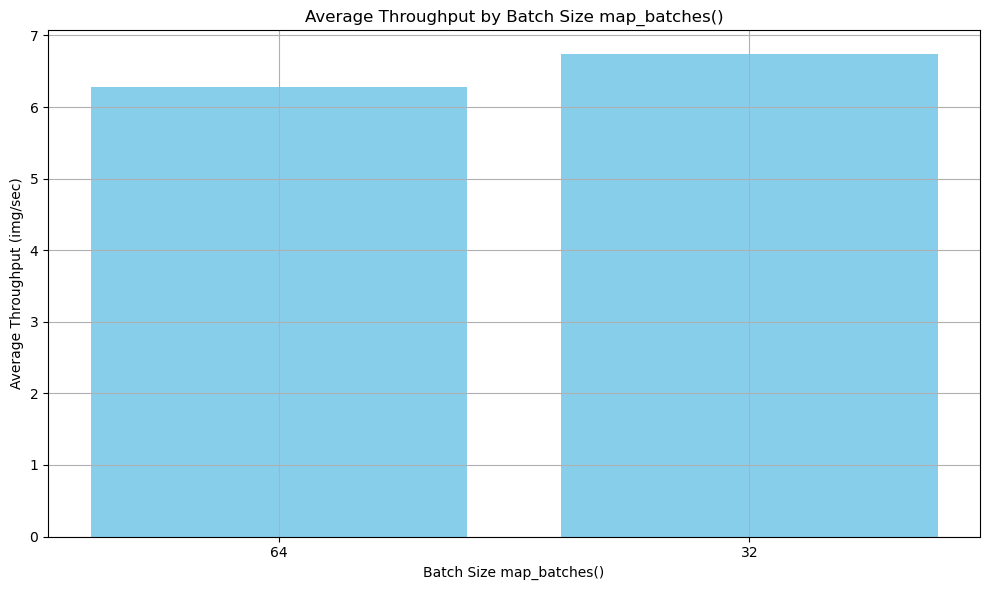

In [9]:
average_throughput_by_batch_size_map_batches = {
    64:         6.281093,
    32:         6.734386
    }

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_batch_size_map_batches)), average_throughput_by_batch_size_map_batches.values(), color='skyblue')
plt.xlabel('Batch Size map_batches()')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Batch Size map_batches()')
plt.xticks(range(len(average_throughput_by_batch_size_map_batches)), average_throughput_by_batch_size_map_batches.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

### Concurrency
Finally, let's see how the last parameter affects individually to the throughput with each different value: [1, 2, 3]

In [10]:
# Group data by the "concurrency" value and calculate the mean throughput for each group
average_throughput_by_concurrency = data.groupby("Concurrency")["Throughput (img/sec)"].mean()

print("Average Throughput by Concurrency:")
print(average_throughput_by_concurrency)

Average Throughput by Concurrency:
Concurrency
1    5.059585
2    6.920991
3    7.542641
Name: Throughput (img/sec), dtype: float64


Analysis of Throughput by Concurrency Levels

- **Concurrency 1**: With a concurrency setting of 1, the throughput is approximately **5.060 images/sec**. This lower throughput indicates that at this level, tasks are likely being processed sequentially, which could lead to underutilization of available computational resources, particularly in multi-core or multi-threaded environments.

- **Concurrency 2**: Doubling the concurrency to 2 increases throughput significantly to about **6.921 images/sec**. This suggests that the system is capable of effectively utilizing additional computational threads or cores to handle multiple tasks concurrently, thereby reducing idle time and improving overall efficiency.

- **Concurrency 3**: Increasing the concurrency level to 3 further improves the throughput to approximately **7.543 images/sec**. This continued improvement indicates a good scaling of the processing pipeline with additional concurrent tasks, suggesting that the system's architecture and the workload can effectively exploit higher levels of parallel processing.

Observations

1. **Effective Resource Utilization**: The increase in throughput with higher concurrency levels indicates that processing tasks can effectively utilize more parallel processing resources. This is a good sign that the pipeline is well-optimized for concurrent operations and can take advantage of multi-core architectures.

2. **Scaling Beyond Concurrency of 3**: Given the pattern of increasing throughput with higher concurrency, it may be beneficial to experiment with concurrency levels beyond 3 to determine if the trend continues or if there is a saturation point where further increases in concurrency no longer result in significant throughput gains.

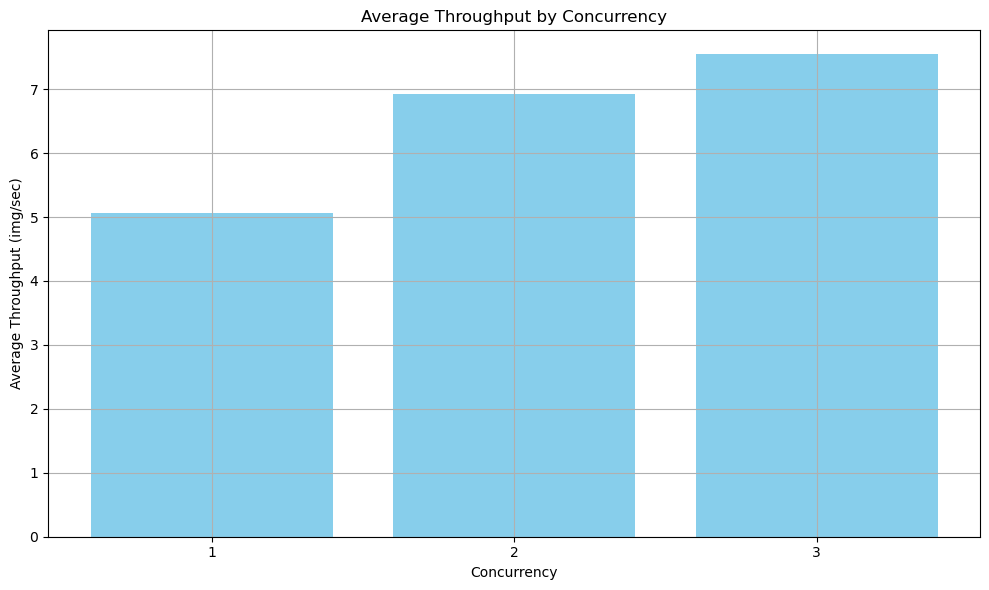

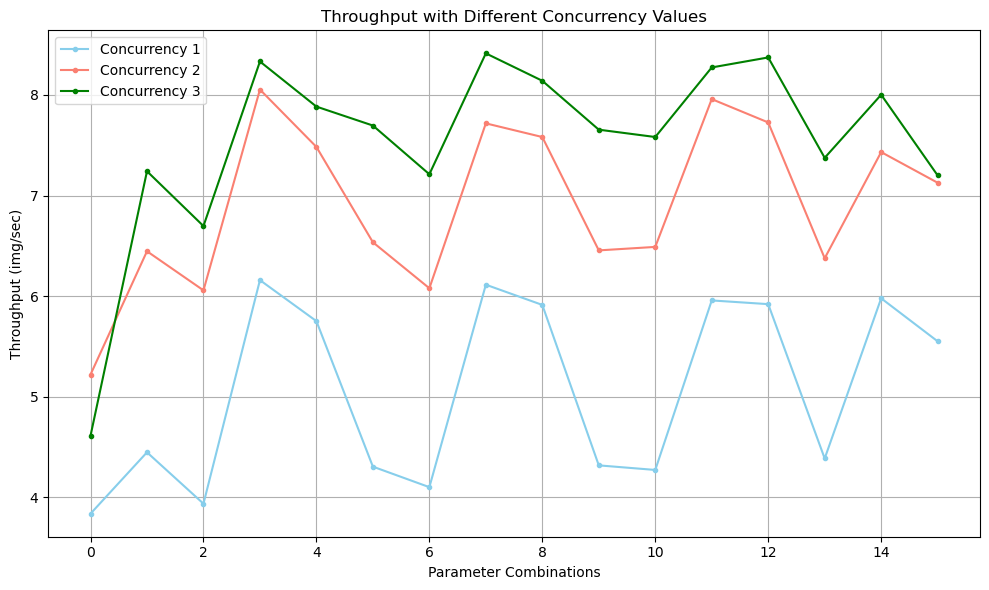

In [12]:
average_throughput_by_concurrency = {
    1: 5.059585,
    2: 6.920991,
    3: 7.542641
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_concurrency)), average_throughput_by_concurrency.values(), color='skyblue')
plt.xlabel('Concurrency')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Concurrency')
plt.xticks(range(len(average_throughput_by_concurrency)), average_throughput_by_concurrency.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter data where concurrency is 1, 2, 3
concurrency_1 = data[data["Concurrency"] == 1]
concurrency_2 = data[data["Concurrency"] == 2]
concurrency_3 = data[data["Concurrency"] == 3]

# Create a list of parameter combinations for each value of "Concurrency" (1, 2, 3)
param_combinations_1 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in concurrency_1.iterrows()]
param_combinations_2 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in concurrency_2.iterrows()]
param_combinations_3 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in concurrency_3.iterrows()]

# Extract throughput values for each value of "Concurrency"
throughput_values_1 = concurrency_1["Throughput (img/sec)"].tolist()
throughput_values_2 = concurrency_2["Throughput (img/sec)"].tolist()
throughput_values_3 = concurrency_3["Throughput (img/sec)"].tolist()


# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_combinations_1)), throughput_values_1, marker='.', color='skyblue', linestyle='-', label='Concurrency 1')
plt.plot(range(len(param_combinations_2)), throughput_values_2, marker='.', color='salmon', linestyle='-', label='Concurrency 2')
plt.plot(range(len(param_combinations_3)), throughput_values_3, marker='.', color='green', linestyle='-', label='Concurrency 3')
plt.xlabel('Parameter Combinations')
plt.ylabel('Throughput (img/sec)')
plt.title('Throughput with Different Concurrency Values')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Extra Plots

So far, the analysis has evaluated each parameter individually, which is often useful. For instance, the best CPU was 2, aligning with the number 2 observed in the optimal parameter combination determined earlier that led to the highest throughput. A similar pattern emerges with batch size, where 32 is identified as the best value, again matching the optimal combination. Same for concurrency = 3. However, this trend does not hold for parallelism. This discrepancy underscores the importance of considering how parameters interact with each other to fully understand the dynamics at play. Let's take a look at some more complex plots.

### Heatmaps
These can be useful for visualizing the interaction between two parameters. Let's create some heatmaps of throughput

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


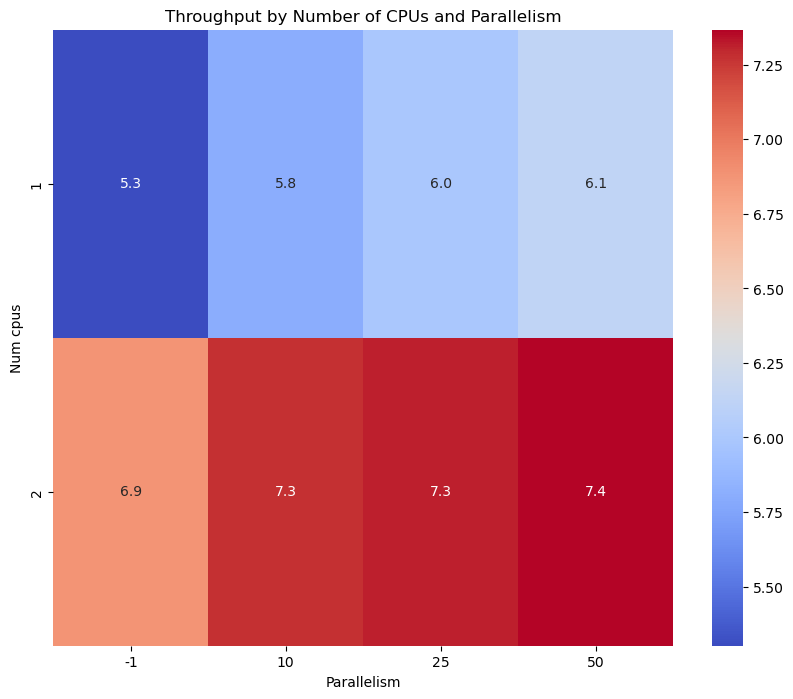

In [13]:
import seaborn as sns

heatmap_data = data.pivot_table(values='Throughput (img/sec)', index='Num cpus', columns='Parallelism', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Throughput by Number of CPUs and Parallelism')
plt.show()

1. **CPU Impact**: Increasing CPU cores from 1 to 2 leads to significant throughput improvements across all levels of parallelism, illustrating a dominant influence of CPU allocation on performance.

2. **Parallelism Impact**: While increasing parallelism does improve throughput, especially when moving from an auto setting to defined levels (e.g., 10, 25, 50), the improvements are modest compared to the gains from adding an additional CPU.

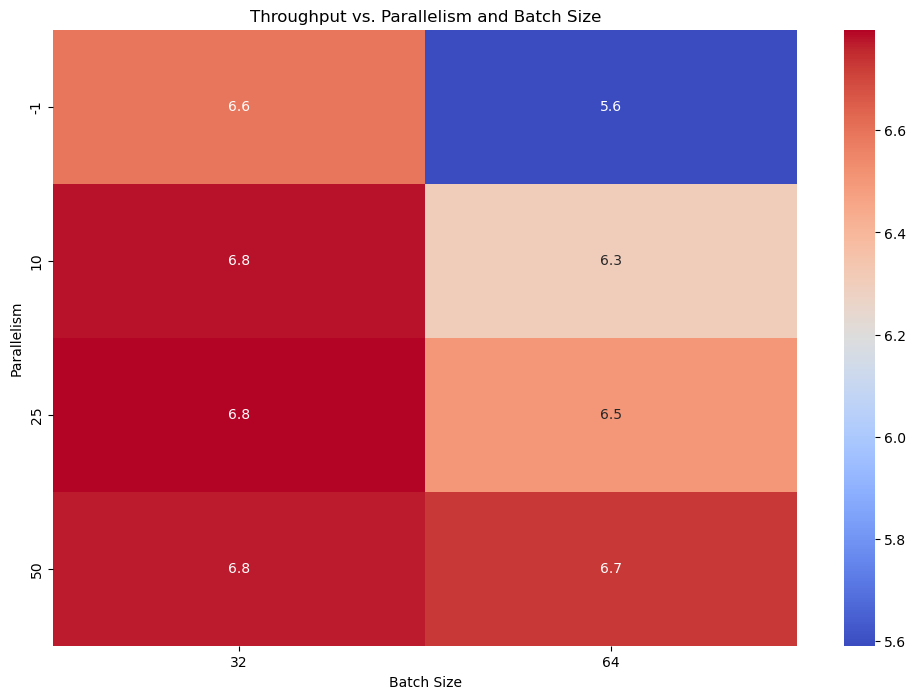

In [25]:
# Pivot the table for the second heatmap data
heatmap2_data = data.pivot_table(values='Throughput (img/sec)', index='Parallelism', columns='Batch size map_batches()', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap2_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Throughput vs. Parallelism and Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Parallelism')
plt.show()

Key Findings:
- **Batch Size 32**: Achieves consistently high throughput across all levels of parallelism, ranging from 6.6 to 6.8 images/sec.
- **Batch Size 64**: Generally results in lower throughput, from 5.6 to 6.7 images/sec, with improvements as parallelism increases but still not matching the throughput of a smaller batch size.

Conclusion:
Changing the batch size from 32 to 64 has a substantial and generally negative impact on throughput, making it the more critical factor to consider when optimizing for performance. Parallelism can slightly offset the drawbacks of larger batch sizes but is not as influential as batch size in determining overall throughput.

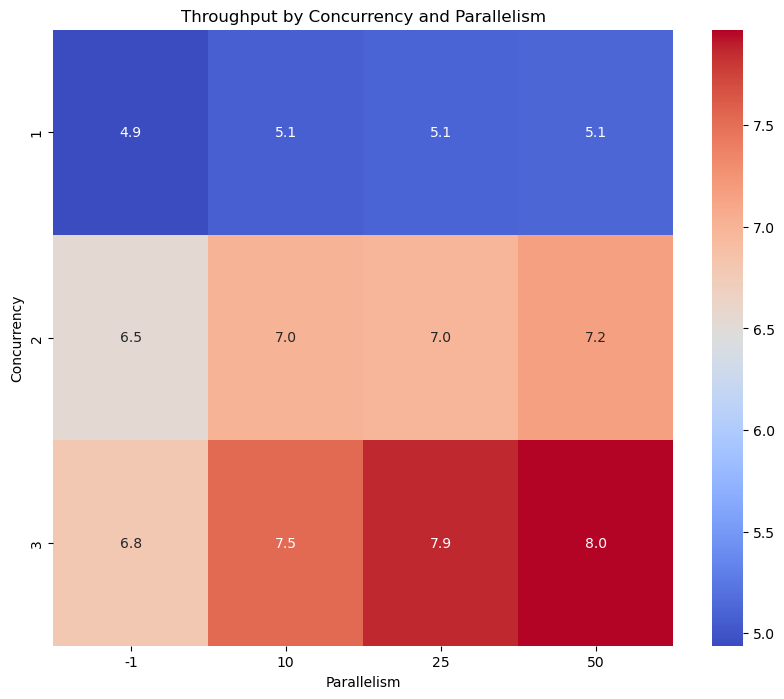

In [21]:
import seaborn as sns

heatmap_data = data.pivot_table(values='Throughput (img/sec)', index='Concurrency', columns='Parallelism', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Throughput by Concurrency and Parallelism')
plt.show()

Key Observations:
- **Concurrency Levels**: Throughput increases significantly with higher concurrency levels. For instance, at concurrency level 1, throughput ranges from 4.9 to 5.1 images/sec. At concurrency level 3, it increases substantially, reaching up to 8.0 images/sec at a parallelism of 50.
- **Parallelism Impact**: Within each concurrency level, increasing parallelism generally leads to improved throughput. The most notable improvement is observed as concurrency levels and parallelism both increase.

Conclusion:
Concurrency has a more substantial impact on throughput than parallelism. While higher levels of both parameters improve performance, increasing concurrency from 1 to 3 results in more significant throughput enhancements than varying levels of parallelism alone. This suggests that optimizing concurrency settings might be more crucial for achieving higher throughput in this system setup.

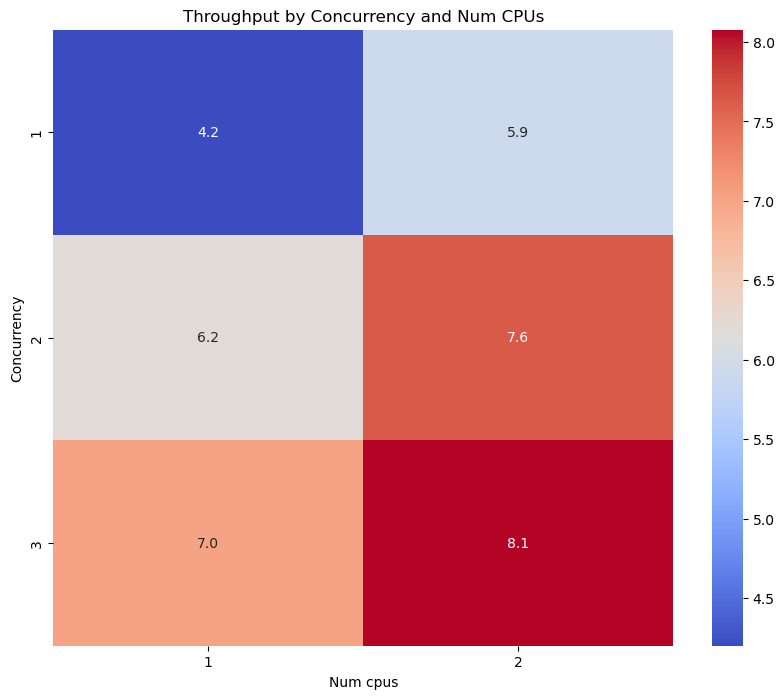

In [22]:
import seaborn as sns

heatmap_data = data.pivot_table(values='Throughput (img/sec)', index='Concurrency', columns='Num cpus', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Throughput by Concurrency and Num CPUs')
plt.show()

Key Observations:
- **Number of CPUs**: Increasing the number of CPUs from 1 to 2 consistently leads to higher throughput across all concurrency levels. For instance, at concurrency level 1, throughput increases from 4.2 to 5.9 images/sec, and at concurrency level 3, it jumps from 7.0 to 8.1 images/sec.
- **Concurrency Levels**: Higher concurrency also increases throughput, but the most significant gains are seen when combined with an increased number of CPUs.

Conclusion:
The number of CPUs has a more pronounced impact on throughput than concurrency. While increasing concurrency does improve performance, the addition of more CPUs provides a more substantial boost across all levels of concurrency, indicating that CPU resources are a critical factor in achieving higher throughput.

### 3D Scatter Plot
Finally, let's use a 3D scatter plot to plot three variables, since Num CPUs and Concurrency are the most influential parameters, we will fix them and plot different Parallelism and Batch size on the axes and use color to represent the fourth variable (Throughput). This visualization allows to discern patterns and relationships between these parameters and their effect on throughput.

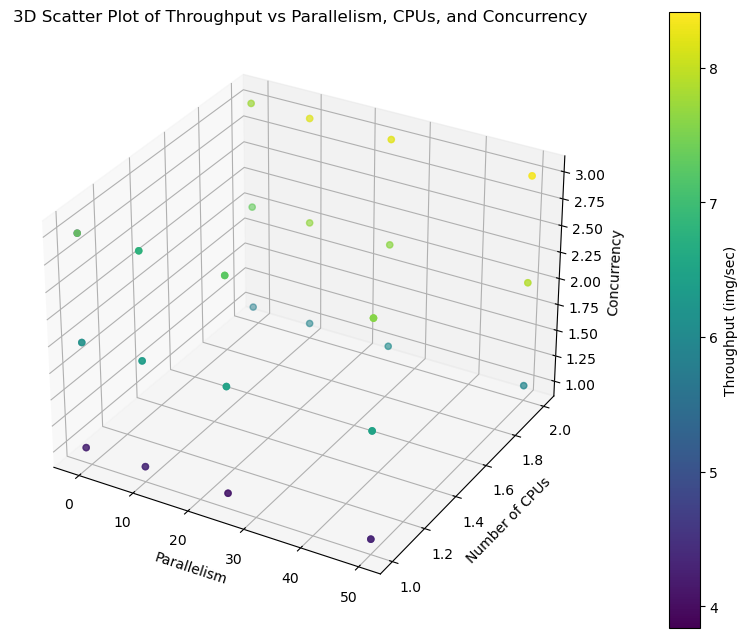

In [26]:
data = pd.read_csv('/home/joan/TFM/metrics_torchscript_embl_inference.csv')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Parallelism'], data['Num cpus'], data['Concurrency'], c=data['Throughput (img/sec)'],
                     cmap='viridis', depthshade=True)

# Adding labels and title
ax.set_xlabel('Parallelism')
ax.set_ylabel('Number of CPUs')
ax.set_zlabel('Concurrency')
ax.set_title('3D Scatter Plot of Throughput vs Parallelism, CPUs, and Concurrency')

# Color bar to show throughput values
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Throughput (img/sec)')

plt.show()

Key Observations:
- **Higher Throughput Zones**: Higher throughput values are shown in yellow, indicating that higher throughput is achieved at greater values of concurrency and CPU count.
- **Influence of CPUs and Concurrency**: The throughput generally increases as both the number of CPUs and concurrency levels increase. For instance, data points with the highest throughput are also those with the highest values of CPUs and concurrency.
- **Parallelism’s Impact**: The impact of parallelism is less visually distinct compared to CPUs and concurrency. It appears to be less influential in determining throughput, as higher throughput points are spread across various parallelism levels without a clear trend.

Conclusion:
Concurrency and CPU count are more influential on throughput than parallelism in this data set, with the highest throughput achieved when both are at their maximum levels.

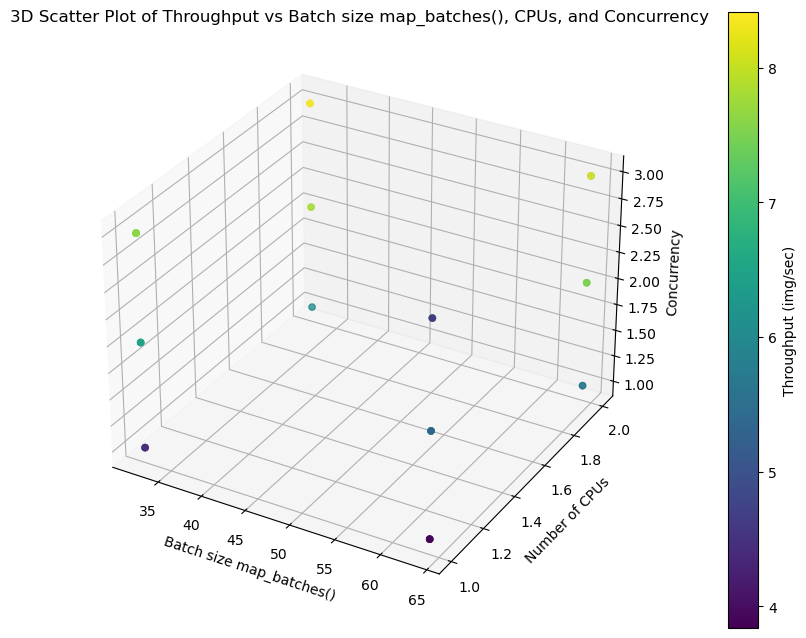

In [27]:
data = pd.read_csv('/home/joan/TFM/metrics_torchscript_embl_inference.csv')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Batch size map_batches()'], data['Num cpus'], data['Concurrency'], c=data['Throughput (img/sec)'],
                     cmap='viridis', depthshade=True)

# Adding labels and title
ax.set_xlabel('Batch size map_batches()')
ax.set_ylabel('Number of CPUs')
ax.set_zlabel('Concurrency')
ax.set_title('3D Scatter Plot of Throughput vs Batch size map_batches(), CPUs, and Concurrency')

# Color bar to show throughput values
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Throughput (img/sec)')

plt.show()

Key Observations:
- **High Throughput Points**: The highest throughput values (colored in yellow) are observed with higher concurrency levels, regardless of the batch size and CPU count.
- **Influence of Concurrency**: Concurrency appears to have a significant impact on throughput, as higher concurrency generally aligns with higher throughput levels.
- **Impact of CPUs**: Increasing the number of CPUs seems beneficial but less impactful than concurrency, as higher throughput can occur across varying CPU counts.
- **Variability with Batch Size**: The batch size does not show a clear trend in impacting throughput; high throughput can occur across the entire range of batch sizes tested.

Conclusion:
Concurrency stands out as the most influential factor for throughput in this scenario, with higher levels consistently associated with better performance. The number of CPUs also plays a role, though its impact is less pronounced than concurrency. Batch size shows the least influence, indicating that throughput is less sensitive to changes in batch size within the tested range.